## 1. Downloading the Atlases and Phenotypic csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/preprocessed-connectomes-project/abide.git
%cd abide

Cloning into 'abide'...
remote: Enumerating objects: 1029, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 1029 (delta 108), reused 168 (delta 108), pack-reused 861 (from 1)
Receiving objects: 100% (1029/1029), 67.48 MiB | 21.98 MiB/s, done.
Resolving deltas: 100% (547/547), done.
/content/abide


In [ ]:
!sed -i 's/{0:d}/{0:g}/g' download_abide_preproc.py

!python download_abide_preproc.py \
-d rois_cc200 \
-p cpac \
-s filt_global \
-o "/content/drive/MyDrive/ABIDE"

No upper age threshold specified
No lower age threshold specified
No site specified, using all sites...
No sex specified, using all sexes...
Could not find /content/drive/MyDrive/ABIDE, creating now...
b',Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_TOTAL,ADOS_COMM,ADOS_SOCIAL,ADOS_STEREO_BEHAV,ADOS_RSRCH_RELIABLE,ADOS_GOTHAM_SOCAFFECT,ADOS_GOTHAM_RRB,ADOS_GOTHAM_TOTAL,ADOS_GOTHAM_SEVERITY,SRS_VERSION,SRS_RAW_TOTAL,SRS_AWARENESS,SRS_COGNITION,SRS_COMMUNICATION,SRS_MOTIVATION,SRS_MANNERISMS,SCQ_TOTAL,AQ_TOTAL,COMORBIDITY,CURRENT_MED_STATUS,MEDICATION_NAME,OFF_STIMULANTS_AT_SCAN,VINELAND_RECEPTIVE_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,VINELAND_WRITTEN_V_SCALED,VINELAND_COMMUNICATION_STANDARD,VINELAND_PERSONAL_V_SCALED,VINELAND_DOMESTIC_V_SCALED,VINE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/ABIDE/Outputs/cpac/filt_global/rois_cc200/Pitt_0050004_rois_cc200.1D"

data = np.loadtxt(file_path)
print(f"Shape: {data.shape} (timepoints x ROIs)")

Shape: (196, 200) (timepoints x ROIs)


In [ ]:
data

array([[  3.510742,  -8.563818,  -2.230449, ...,  12.065973,  -2.510763,
          9.920274],
       [  6.841208, -16.208775,  -1.884498, ...,  11.766283,  -4.279793,
         13.869272],
       [  8.397273, -19.817734,  -1.69986 , ...,   4.360602,  -1.289361,
         10.748078],
       ...,
       [ -8.37102 ,  13.413166, -14.410899, ...,  -4.704362, -12.018577,
         -4.255131],
       [ -7.327961,  14.530759, -20.528822, ...,  -2.62062 , -13.122994,
         -6.230438],
       [ -4.532655,   8.253639, -19.269317, ...,   0.873231,  -6.893971,
         -4.146759]])

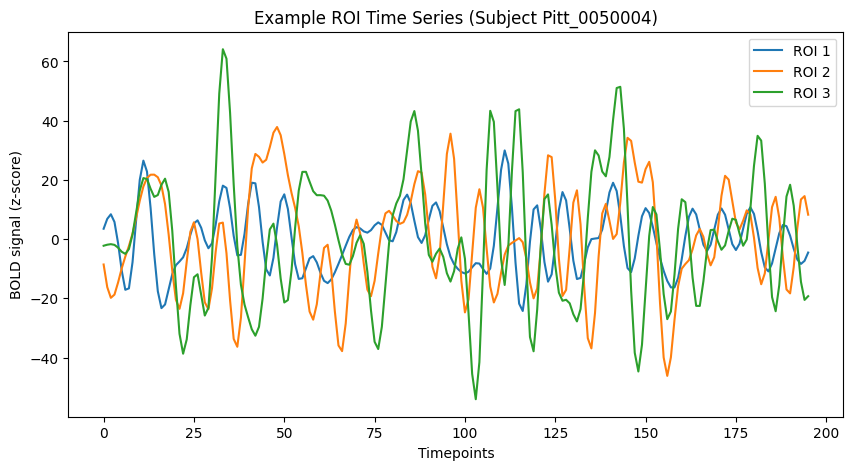

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data[:,0], label="ROI 1")
plt.plot(data[:,1], label="ROI 2")
plt.plot(data[:,2], label="ROI 3")
plt.title("Example ROI Time Series (Subject Pitt_0050004)")
plt.xlabel("Timepoints")
plt.ylabel("BOLD signal (z-score)")
plt.legend()
plt.show()

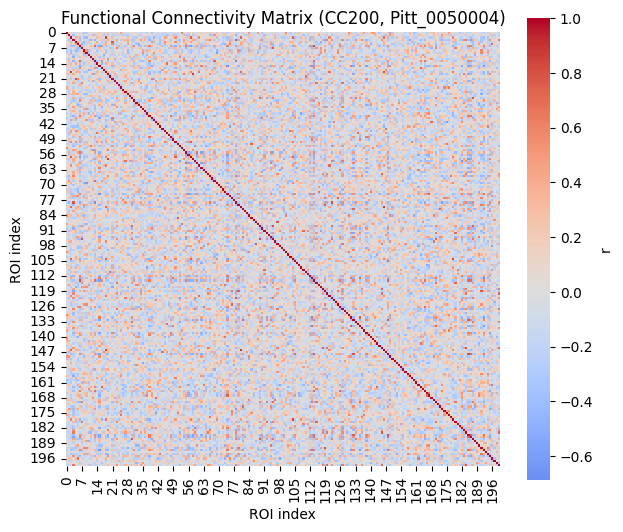

In [ ]:
corr = np.corrcoef(data.T)

plt.figure(figsize=(7,6))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, cbar_kws={"label": "r"})
plt.title("Functional Connectivity Matrix (CC200, Pitt_0050004)")
plt.xlabel("ROI index")
plt.ylabel("ROI index")
plt.show()

In [ ]:
!wget -O /content/drive/MyDrive/ABIDE/Phenotypic_V1_0b_preprocessed1.csv \
https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE_Initiative/Phenotypic_V1_0b_preprocessed1.csv

--2025-11-15 09:21:05--  https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE_Initiative/Phenotypic_V1_0b_preprocessed1.csv
Resolving fcp-indi.s3.amazonaws.com (fcp-indi.s3.amazonaws.com)... 52.217.113.9, 54.231.166.57, 3.5.27.200, ...
Connecting to fcp-indi.s3.amazonaws.com (fcp-indi.s3.amazonaws.com)|52.217.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449443 (439K) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/ABIDE/Phenotypic_V1_0b_preprocessed1.csv’

/content/drive/MyDr 100%[===================>] 438.91K  --.-KB/s    in 0.1s    

2025-11-15 09:21:06 (4.12 MB/s) - ‘/content/drive/MyDrive/ABIDE/Phenotypic_V1_0b_preprocessed1.csv’ saved [449443/449443]



##2. Mapping

In [ ]:
import pandas as pd

phenopath = "/content/drive/MyDrive/ABIDE/Phenotypic_V1_0b_preprocessed1.csv"
pheno = pd.read_csv(phenopath)
print(pheno.shape)
pheno.head()

(1112, 106)


,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1


In [ ]:
pheno.columns.tolist()

['Unnamed: 0.1',
 'Unnamed: 0',
 'SUB_ID',
 'X',
 'subject',
 'SITE_ID',
 'FILE_ID',
 'DX_GROUP',
 'DSM_IV_TR',
 'AGE_AT_SCAN',
 'SEX',
 'HANDEDNESS_CATEGORY',
 'HANDEDNESS_SCORES',
 'FIQ',
 'VIQ',
 'PIQ',
 'FIQ_TEST_TYPE',
 'VIQ_TEST_TYPE',
 'PIQ_TEST_TYPE',
 'ADI_R_SOCIAL_TOTAL_A',
 'ADI_R_VERBAL_TOTAL_BV',
 'ADI_RRB_TOTAL_C',
 'ADI_R_ONSET_TOTAL_D',
 'ADI_R_RSRCH_RELIABLE',
 'ADOS_MODULE',
 'ADOS_TOTAL',
 'ADOS_COMM',
 'ADOS_SOCIAL',
 'ADOS_STEREO_BEHAV',
 'ADOS_RSRCH_RELIABLE',
 'ADOS_GOTHAM_SOCAFFECT',
 'ADOS_GOTHAM_RRB',
 'ADOS_GOTHAM_TOTAL',
 'ADOS_GOTHAM_SEVERITY',
 'SRS_VERSION',
 'SRS_RAW_TOTAL',
 'SRS_AWARENESS',
 'SRS_COGNITION',
 'SRS_COMMUNICATION',
 'SRS_MOTIVATION',
 'SRS_MANNERISMS',
 'SCQ_TOTAL',
 'AQ_TOTAL',
 'COMORBIDITY',
 'CURRENT_MED_STATUS',
 'MEDICATION_NAME',
 'OFF_STIMULANTS_AT_SCAN',
 'VINELAND_RECEPTIVE_V_SCALED',
 'VINELAND_EXPRESSIVE_V_SCALED',
 'VINELAND_WRITTEN_V_SCALED',
 'VINELAND_COMMUNICATION_STANDARD',
 'VINELAND_PERSONAL_V_SCALED',
 'VINELAND_DOME

In [ ]:
pheno.describe()

,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_SCORES,...,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr,SUB_IN_SMP
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,370.000000,...,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1112.000000
mean,555.500000,556.500000,50752.684353,556.500000,50752.684353,1.515288,-646.819245,17.048864,1.147482,-102.560892,...,100.548498,2.116388,1.103531,0.005525,0.012778,0.131138,27.218380,12.952826,0.028416,0.686151
std,321.151055,321.151055,447.680666,321.151055,447.680666,0.499991,2461.828856,8.036419,0.354745,1273.177790,...,43.552970,0.345282,0.117803,0.006464,0.011212,0.157728,42.757583,18.216671,0.021070,0.464265
min,0.000000,1.000000,50002.000000,1.000000,50002.000000,1.000000,-9999.000000,6.470000,1.000000,-9999.000000,...,33.836513,1.581108,0.709671,0.000182,0.001693,0.016117,0.000000,0.000000,-0.015812,0.000000
25%,277.750000,278.750000,50354.750000,278.750000,50354.750000,1.000000,0.000000,11.658575,1.000000,48.000000,...,69.047209,1.862772,1.026977,0.001124,0.006333,0.050888,2.000000,0.995025,0.013075,0.000000
50%,555.500000,556.500000,50724.500000,556.500000,50724.500000,2.000000,0.000000,14.660000,1.000000,75.000000,...,87.681334,2.004123,1.080727,0.003441,0.010043,0.083163,9.000000,4.972376,0.031102,1.000000
75%,833.250000,834.250000,51153.250000,834.250000,51153.250000,2.000000,1.000000,20.085000,1.000000,91.000000,...,125.779269,2.328370,1.172068,0.006977,0.015189,0.143479,33.000000,16.977985,0.042821,1.000000
max,1111.000000,1112.000000,51607.000000,1112.000000,51607.000000,2.000000,4.000000,64.000000,2.000000,100.000000,...,326.544102,3.753481,1.571101,0.080158,0.098614,1.434912,288.000000,91.735537,0.104225,1.000000


In [ ]:
# pheno['qc_func_notes_rater_2'].isna().any()
pheno['qc_func_rater_2'].isna().any()

np.True_

In [ ]:
import pandas as pd
import glob, os, re

roi_path = "/content/drive/MyDrive/ABIDE/Outputs/cpac/filt_global/rois_cc200/"
files = glob.glob(os.path.join(roi_path, "*.1D"))

records = []

for f in files:
    name = os.path.basename(f)
    # Find any 7-digit number in the filename (e.g., 0050004)
    match = re.search(r"\d{7}", name)
    if match:
        sub_id = int(match.group(0))
        records.append((sub_id, f))
    else:
        print(f"⚠️ Could not find subject ID in: {name}")

roi_df = pd.DataFrame(records, columns=["SUB_ID", "FilePath"])

print(f"✅ Successfully parsed {len(roi_df)} files with subject IDs.")

✅ Successfully parsed 884 files with subject IDs.


In [ ]:
import pandas as pd

phenopath = "/content/drive/MyDrive/ABIDE/Phenotypic_V1_0b_preprocessed1.csv"
pheno = pd.read_csv(phenopath)

print(pheno.shape)
pheno.head()

(1112, 106)


,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1


In [ ]:
import pandas as pd
import numpy as np
import glob, os, re

# ---------------------------
# 1. Load phenotypic CSV
# ---------------------------
phenopath = "/content/drive/MyDrive/ABIDE/Phenotypic_V1_0b_preprocessed1.csv"
pheno = pd.read_csv(phenopath)

# ---------------------------
# 2. Load all CC200 .1D files
# ---------------------------
roi_path = "/content/drive/MyDrive/ABIDE/Outputs/cpac/filt_global/rois_cc200/"
files = glob.glob(os.path.join(roi_path, "*.1D"))

records = []

for f in files:
    name = os.path.basename(f)

    # Extract 7-digit subject ID
    match = re.search(r"\d{7}", name)
    if match:
        sub_id = int(match.group(0))
        records.append((sub_id, f))
    else:
        print(f"⚠️ Could not find subject ID in: {name}")

roi_df = pd.DataFrame(records, columns=["SUB_ID", "FilePath"])

# ---------------------------
# 3. Merge phenotype + filepaths
# ---------------------------
merged = pheno.merge(roi_df, on="SUB_ID", how="inner")

print(f"Subjects merged: {merged.shape[0]}")

# ---------------------------
# 4. Function to compute FC vector
# ---------------------------
def compute_fc_vector(path):
    data = np.loadtxt(path)               # shape: timepoints × 200 ROIs
    corr = np.corrcoef(data.T)            # shape: 200 × 200

    # Upper triangle (no diagonal)
    iu = np.triu_indices(corr.shape[0], k=1)
    vec = corr[iu]                        # length = 19,900

    return vec

# ---------------------------
# 5. Compute FC for all subjects
# ---------------------------
fc_features = np.vstack(merged["FilePath"].apply(compute_fc_vector))

print("FC feature matrix shape:", fc_features.shape)
# Expected: (884, 19900)

# ---------------------------
# 6. Build final dataframe (phenotypes + FC features)
# ---------------------------
fc_df = pd.DataFrame(fc_features,
                     columns=[f"FC_{i}" for i in range(fc_features.shape[1])])

final_df = pd.concat([merged.reset_index(drop=True), fc_df], axis=1)

print("Final dataset shape:", final_df.shape)
# Expected ~ (884, 20006)

# ---------------------------
# 7. Save CSV
# ---------------------------
output_csv = "/content/drive/MyDrive/ABIDE/ABIDE_CC200_FC_Features.csv"
final_df.to_csv(output_csv, index=False)

print(f"\n✅ Saved flattened FC feature dataset to: {output_csv}")

Subjects merged: 884


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


FC feature matrix shape: (884, 19900)
Final dataset shape: (884, 20007)

✅ Saved flattened FC feature dataset to: /content/drive/MyDrive/ABIDE/ABIDE_CC200_FC_Features.csv


In [ ]:
import pandas as pd

# Load the previously saved FC dataset
input_csv = "/content/drive/MyDrive/ABIDE/ABIDE_CC200_FC_Features.csv"
df = pd.read_csv(input_csv)

# -------------------------------------
# 1. Keep only SUB_ID, DX_GROUP, FC_* columns
# -------------------------------------
keep_cols = ["SUB_ID", "DX_GROUP"] + [c for c in df.columns if c.startswith("FC_")]
final_df = df[keep_cols]

# -------------------------------------
# 2. Print final shape
# -------------------------------------
print("Final dataset shape:", final_df.shape)
# Expected: (884, 19902)

# -------------------------------------
# 3. Save FINAL CSV
# -------------------------------------
output_csv = "/content/drive/MyDrive/ABIDE/ABIDE_CC200_FINAL.csv"
final_df.to_csv(output_csv, index=False)

print(f"\n✅ Final CSV saved to:\n{output_csv}")

/tmp/ipython-input-2966873321.py:5: DtypeWarning: Columns (11,16,17,18,43,44,45,96,98,100,102,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv)


Final dataset shape: (884, 19902)

✅ Final CSV saved to:
/content/drive/MyDrive/ABIDE/ABIDE_CC200_FINAL.csv


## 3. Data Preprocessing

In [ ]:
import pandas as pd

# Load your final dataset
df = pd.read_csv("/content/drive/MyDrive/ABIDE/ABIDE_CC200_FINAL.csv")

# Total number of null cells
total_nulls = df.isna().sum().sum()

print("Total number of null cells in the dataset:", total_nulls)

Total number of null cells in the dataset: 61069


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/ABIDE/ABIDE_CC200_FINAL.csv")

nan_subjects = df[df.isna().any(axis=1)]["SUB_ID"]

print("Number of subjects with NaNs:", len(nan_subjects))
print("Subjects with NaNs:")
print(nan_subjects.values)

Number of subjects with NaNs: 35
Subjects with NaNs:
[50045 50184 50195 50209 50210 50211 50216 50257 50259 50605 50651 50653
 50657 50669 50727 50736 51062 51118 51456 51457 51458 51460 51464 51466
 51467 51468 51469 51470 51471 51473 51478 51483 51484 51490 51558]


In [ ]:
# Drop all subjects that contain ANY NaN
df_clean = df.dropna()

print("Shape after removing NaN subjects:", df_clean.shape)

Shape after removing NaN subjects: (849, 19902)


In [ ]:
# Find columns where pandas reports mixed types (object type)
mixed_cols = [col for col in df_clean.columns if df_clean[col].dtype == 'object']

print("Columns with object/mixed dtype:")
print(mixed_cols)
print("\nTotal mixed dtype columns:", len(mixed_cols))

Columns with object/mixed dtype:
[]

Total mixed dtype columns: 0


In [ ]:
print(df_clean["DX_GROUP"].value_counts())

DX_GROUP
2    458
1    391
Name: count, dtype: int64


In [ ]:
dupes = df_clean["SUB_ID"].duplicated().sum()
print("Duplicate subjects:", dupes)

Duplicate subjects: 0


In [ ]:
print("Total NaNs:", df_clean.isna().sum().sum())

Total NaNs: 0


In [ ]:
import numpy as np

print("Infinite values:", np.isinf(df_clean).sum().sum())
print("Very large values (>10):", (df_clean.abs() > 10).sum().sum())

Infinite values: 0
Very large values (>10): 849


In [ ]:
variances = df_clean.drop(["SUB_ID", "DX_GROUP"], axis=1).var(axis=0)

const_cols = variances[variances == 0].index
print("Number of constant features:", len(const_cols))

# Optional: drop them
df_clean = df_clean.drop(columns=const_cols)

Number of constant features: 0


In [ ]:
sample = df_clean.drop(["SUB_ID", "DX_GROUP"], axis=1).sample(500, axis=1)
corr_sample = sample.corr().abs()

print("Mean correlation:", corr_sample.mean().mean())

Mean correlation: 0.04913872795360358


In [ ]:
bad_subjects = df_clean.loc[(df_clean.drop(["SUB_ID", "DX_GROUP"], axis=1).abs() > 10).any(axis=1), "SUB_ID"]

print("Number of subjects with invalid FC values:", len(bad_subjects))
print(bad_subjects.values)

Number of subjects with invalid FC values: 0
[]


In [ ]:
# Save the cleaned dataset
output_path = "/content/drive/MyDrive/ABIDE/ABIDE_CC200_FINAL_NO_NAN.csv"
df_clean.to_csv(output_path, index=False)

print(f"✅ Clean dataset saved to:\n{output_path}")

✅ Clean dataset saved to:
/content/drive/MyDrive/ABIDE/ABIDE_CC200_FINAL_NO_NAN.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ABIDE/ABIDE_CC200_FINAL_NO_NAN.csv")

print("Loaded shape:", df.shape)

Loaded shape: (849, 19902)


## 4. SVM

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ABIDE/ABIDE_CC200_FINAL_NO_NAN.csv")
print("Loaded shape:", df.shape)

Loaded shape: (849, 19902)


In [4]:
df["DX_GROUP"] = df["DX_GROUP"].replace({2: 0, 1: 1})

print("\nLabel counts (0=Control, 1=ASD):")
print(df["DX_GROUP"].value_counts())


Label counts (0=Control, 1=ASD):
DX_GROUP
0    458
1    391
Name: count, dtype: int64


In [5]:
X = df.drop(["SUB_ID", "DX_GROUP"], axis=1).values  # FC features
y = df["DX_GROUP"].values

print("\nFeature matrix shape (raw, unnormalized):", X.shape)


Feature matrix shape (raw, unnormalized): (849, 19900)


In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train full shape:", X_train_full.shape)
print("Test shape:", X_test.shape)

Train full shape: (679, 19900)
Test shape: (170, 19900)


In [7]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
fold_f1s = []
fold_aucs = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    # ----------------------------------
    # 5A. Normalize using ONLY TRAINING FOLD
    # ----------------------------------
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled   = scaler.transform(X_val)   # NO fit here

    # ----------------------------------
    # 5B. PCA using ONLY TRAINING FOLD
    # ----------------------------------
    pca = PCA(n_components=300, random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca   = pca.transform(X_val_scaled)

    # ----------------------------------
    # 5C. Train classifier (linear SVM)
    # ----------------------------------
    clf = SVC(kernel='linear', probability=True, random_state=42)
    clf.fit(X_train_pca, y_train)

    # ----------------------------------
    # 5D. Evaluate on validation fold
    # ----------------------------------
    y_val_pred  = clf.predict(X_val_pca)
    y_val_proba = clf.predict_proba(X_val_pca)[:, 1]

    acc = accuracy_score(y_val, y_val_pred)
    f1  = f1_score(y_val, y_val_pred)
    auc = roc_auc_score(y_val, y_val_proba)

    fold_accuracies.append(acc)
    fold_f1s.append(f1)
    fold_aucs.append(auc)

    print(f"Fold {fold}: ACC={acc:.3f}, F1={f1:.3f}, AUC={auc:.3f}")

Fold 1: ACC=0.603, F1=0.542, AUC=0.653
Fold 2: ACC=0.647, F1=0.607, AUC=0.669
Fold 3: ACC=0.706, F1=0.655, AUC=0.740
Fold 4: ACC=0.691, F1=0.661, AUC=0.735
Fold 5: ACC=0.704, F1=0.649, AUC=0.734


In [8]:
print("\n====== Cross-validation results (5-fold on 80% train) ======")
print(f"Mean Accuracy: {np.mean(fold_accuracies):.3f} ± {np.std(fold_accuracies):.3f}")
print(f"Mean F1 Score: {np.mean(fold_f1s):.3f} ± {np.std(fold_f1s):.3f}")
print(f"Mean AUC:      {np.mean(fold_aucs):.3f} ± {np.std(fold_aucs):.3f}")


====== Cross-validation results (5-fold on 80% train) ======
Mean Accuracy: 0.670 ± 0.040
Mean F1 Score: 0.623 ± 0.045
Mean AUC:      0.706 ± 0.037


In [9]:
scaler_final = StandardScaler().fit(X_train_full)
X_train_scaled_full = scaler_final.transform(X_train_full)

pca_final = PCA(n_components=300, random_state=42).fit(X_train_scaled_full)
X_train_pca_full = pca_final.transform(X_train_scaled_full)

clf_final = SVC(kernel='linear', probability=True, random_state=42)
clf_final.fit(X_train_pca_full, y_train_full)

SVC(kernel='linear', probability=True, random_state=42)

In [10]:
X_test_scaled = scaler_final.transform(X_test)
X_test_pca    = pca_final.transform(X_test_scaled)

y_test_pred  = clf_final.predict(X_test_pca)
y_test_proba = clf_final.predict_proba(X_test_pca)[:, 1]

test_acc = accuracy_score(y_test, y_test_pred)
test_f1  = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print("\n====== FINAL TEST RESULTS (20% hold-out) ======")
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")
print(f"Test AUC:      {test_auc:.3f}")


====== FINAL TEST RESULTS (20% hold-out) ======
Test Accuracy: 0.641
Test F1 Score: 0.601
Test AUC:      0.723


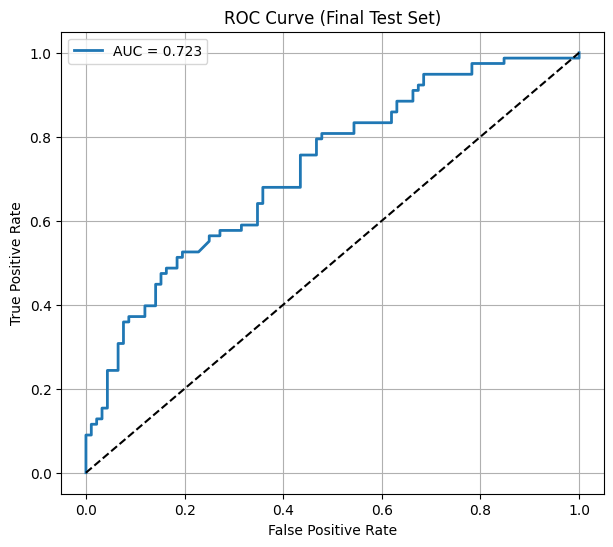

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Final Test Set)")
plt.legend()
plt.grid(True)
plt.show()

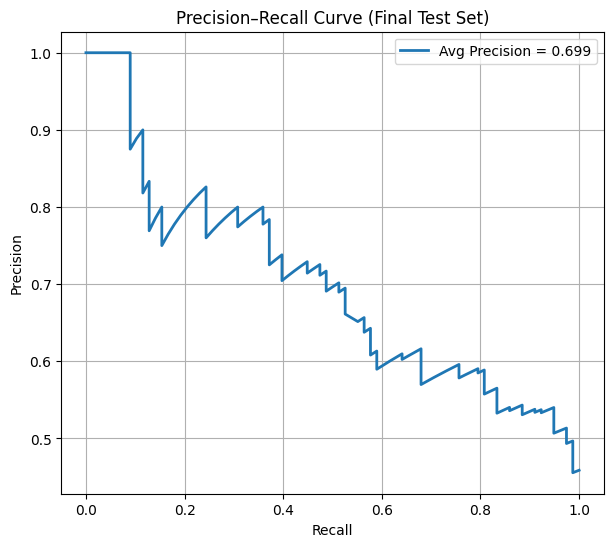

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresh = precision_recall_curve(y_test, y_test_proba)
ap = average_precision_score(y_test, y_test_proba)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, label=f"Avg Precision = {ap:.3f}", linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Final Test Set)")
plt.legend()
plt.grid(True)
plt.show()

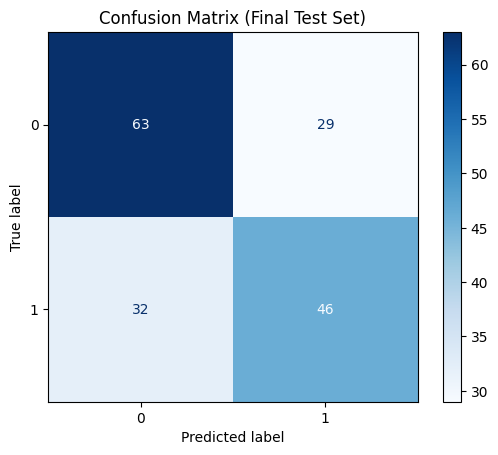

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Final Test Set)")
plt.show()

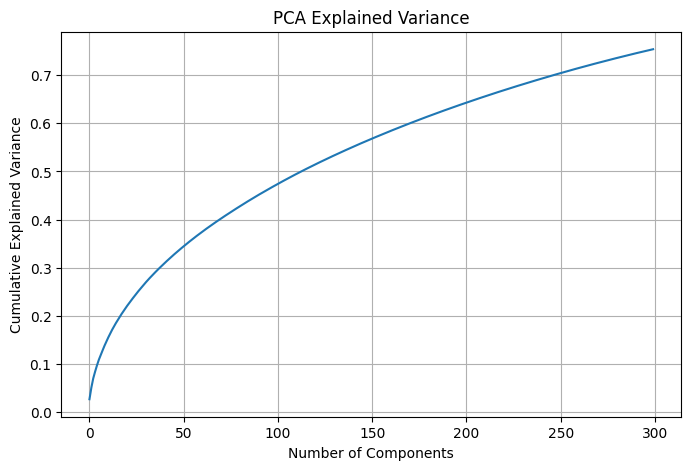

In [14]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_final.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

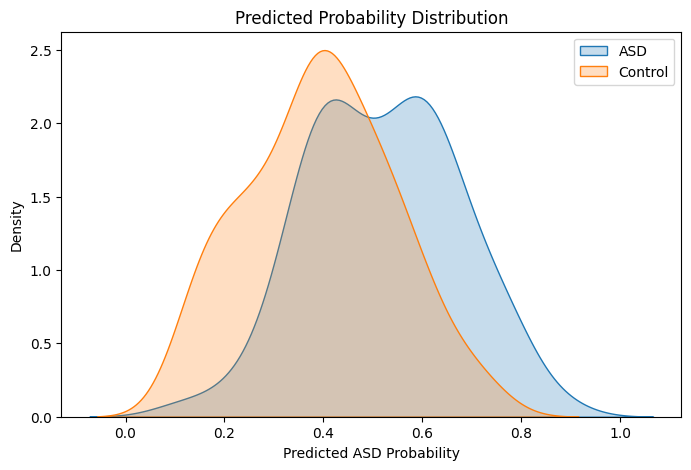

In [15]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.kdeplot(y_test_proba[y_test==1], label="ASD", fill=True)
sns.kdeplot(y_test_proba[y_test==0], label="Control", fill=True)
plt.title("Predicted Probability Distribution")
plt.xlabel("Predicted ASD Probability")
plt.legend()
plt.show()

## 5. DNN

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

In [17]:
df = pd.read_csv("/content/drive/MyDrive/ABIDE/ABIDE_CC200_FINAL_NO_NAN.csv")
print("Data shape:", df.shape)

df["DX_GROUP"] = df["DX_GROUP"].replace({2: 0, 1: 1})

X = df.drop(["SUB_ID", "DX_GROUP"], axis=1).values
y = df["DX_GROUP"].values.astype("float32")

print("Feature matrix:", X.shape)
print("Class counts:\n", pd.Series(y).value_counts())

Data shape: (849, 19902)
Feature matrix: (849, 19900)
Class counts:
 0.0    458
1.0    391
Name: count, dtype: int64


In [18]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train:", X_train_full.shape, " Test:", X_test.shape)

Train: (679, 19900)  Test: (170, 19900)


In [19]:
def build_dnn(input_dim):
    init = tf.keras.initializers.GlorotUniform()

    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(32, activation="relu", kernel_initializer=init),
        layers.Dropout(0.20),

        layers.Dense(32, activation="relu", kernel_initializer=init),
        layers.Dropout(0.20),

        layers.Dense(1, activation="sigmoid", kernel_initializer=init)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [20]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accs, cv_f1s, cv_aucs = [], [], []

for fold, (tr_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n===== Fold {fold} =====")

    X_tr, X_val = X_train_full[tr_idx], X_train_full[val_idx]
    y_tr, y_val = y_train_full[tr_idx], y_train_full[val_idx]

    # --- scale inside fold ---
    scaler = StandardScaler()
    X_tr_s = scaler.fit_transform(X_tr)
    X_val_s = scaler.transform(X_val)

    # --- PCA inside fold (paper does not use PCA, but you requested PCA=200) ---
    pca = PCA(n_components=200, random_state=42)
    X_tr_p = pca.fit_transform(X_tr_s)
    X_val_p = pca.transform(X_val_s)

    # --- build DNN (paper architecture) ---
    model = build_dnn(X_tr_p.shape[1])

    es = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )

    model.fit(
        X_tr_p, y_tr,
        validation_data=(X_val_p, y_val),
        epochs=50,
        batch_size=10,
        verbose=0,
        callbacks=[es]
    )

    y_val_prob = model.predict(X_val_p).ravel()
    y_val_pred = (y_val_prob >= 0.5).astype(int)

    acc = accuracy_score(y_val, y_val_pred)
    f1  = f1_score(y_val, y_val_pred)
    auc = roc_auc_score(y_val, y_val_prob)

    cv_accs.append(acc)
    cv_f1s.append(f1)
    cv_aucs.append(auc)

    print(f"Fold {fold}: ACC={acc:.3f}, F1={f1:.3f}, AUC={auc:.3f}")

print("\n===== 5-FOLD CV MEAN =====")
print(f"Accuracy: {np.mean(cv_accs):.3f}")
print(f"F1-score: {np.mean(cv_f1s):.3f}")
print(f"AUC:      {np.mean(cv_aucs):.3f}")


===== Fold 1 =====
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Fold 1: ACC=0.640, F1=0.602, AUC=0.703

===== Fold 2 =====
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 2: ACC=0.581, F1=0.551, AUC=0.608

===== Fold 3 =====


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 3: ACC=0.691, F1=0.661, AUC=0.747

===== Fold 4 =====
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 4: ACC=0.640, F1=0.608, AUC=0.670

===== Fold 5 =====
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 5: ACC=0.630, F1=0.569, AUC=0.664

===== 5-FOLD CV MEAN =====
Accuracy: 0.636
F1-score: 0.598
AUC:      0.678


In [21]:
# ============================================================
# FINAL TRAINING (Paper settings, corrected)
# ============================================================

# 1. Standardize using *only* training data
scaler_final = StandardScaler()
X_train_s = scaler_final.fit_transform(X_train_full)
X_test_s  = scaler_final.transform(X_test)

# 2. PCA (you chose 200 PCs; paper does NOT use PCA)
pca_final = PCA(n_components=200, random_state=42)
X_train_p = pca_final.fit_transform(X_train_s)
X_test_p  = pca_final.transform(X_test_s)

# 3. Build DNN using PAPER architecture
final_model = build_dnn(X_train_p.shape[1])  # dropout=0.20, lr=0.001, Glorot init

# 4. Early stopping EXACTLY as paper: patience=10
es_final = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# 5. TRAIN exactly 50 epochs (NOT 200)
final_model.fit(
    X_train_p, y_train_full,
    validation_split=0.1,
    epochs=50,              # PAPER SETTING
    batch_size=10,
    verbose=0,
    callbacks=[es_final]
)

print("✔ Final model trained using PAPER settings + PCA=200.")

✔ Final model trained using PAPER settings + PCA=200.


In [22]:
y_test_prob = final_model.predict(X_test_p).ravel()
y_test_pred = (y_test_prob >= 0.5).astype(int)

print("\n===== FINAL TEST RESULTS (DNN + PCA) =====")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Test F1:       {f1_score(y_test, y_test_pred):.3f}")
print(f"Test AUC:      {roc_auc_score(y_test, y_test_prob):.3f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

===== FINAL TEST RESULTS (DNN + PCA) =====
Test Accuracy: 0.635
Test F1:       0.613
Test AUC:      0.694


In [23]:
# ====================================================
# 1. PREPARE DATA (X_train_full, X_test, y_train_full, y_test)
# ====================================================
# Assumes df, X, y, and site-stratified split already created.

print("Train:", X_train_full.shape, "Test:", X_test.shape)


# ====================================================
# 2. PAPER DNN ARCHITECTURE (NO PCA)
# ====================================================
def build_dnn(input_dim):
    init = tf.keras.initializers.GlorotUniform()

    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        layers.Dense(32, activation="relu", kernel_initializer=init),
        layers.Dropout(0.20),

        layers.Dense(32, activation="relu", kernel_initializer=init),
        layers.Dropout(0.20),

        layers.Dense(1, activation="sigmoid", kernel_initializer=init)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


# ====================================================
# 3. 5-FOLD STRATIFIED CV (JUST LIKE THE PAPER)
# ====================================================
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accs, cv_f1s, cv_aucs = [], [], []

for fold, (tr_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n===== Fold {fold} =====")

    X_tr, X_val = X_train_full[tr_idx], X_train_full[val_idx]
    y_tr, y_val = y_train_full[tr_idx], y_train_full[val_idx]

    # SCALE inside fold (NO PCA)
    scaler = StandardScaler()
    X_tr_s = scaler.fit_transform(X_tr)
    X_val_s = scaler.transform(X_val)

    # CREATE MODEL
    model = build_dnn(X_tr_s.shape[1])

    # EARLY STOPPING (PAPER: patience=10)
    es = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )

    # TRAIN (PAPER: 50 EPOCHS)
    model.fit(
        X_tr_s, y_tr,
        validation_data=(X_val_s, y_val),
        epochs=50,
        batch_size=10,
        verbose=0,
        callbacks=[es]
    )

    # EVALUATE
    y_prob = model.predict(X_val_s).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    acc = accuracy_score(y_val, y_pred)
    f1  = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)

    cv_accs.append(acc)
    cv_f1s.append(f1)
    cv_aucs.append(auc)

    print(f"Fold {fold}: ACC={acc:.3f}, F1={f1:.3f}, AUC={auc:.3f}")


print("\n===== 5-FOLD CV RESULTS (NO PCA) =====")
print(f"Mean ACC: {np.mean(cv_accs):.3f}")
print(f"Mean F1 : {np.mean(cv_f1s):.3f}")
print(f"Mean AUC: {np.mean(cv_aucs):.3f}")


# ====================================================
# 4. FINAL TRAINING ON FULL 80% TRAIN SET
# ====================================================
scaler_final = StandardScaler()
X_train_s = scaler_final.fit_transform(X_train_full)
X_test_s  = scaler_final.transform(X_test)

final_model = build_dnn(X_train_s.shape[1])

es_final = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

final_model.fit(
    X_train_s, y_train_full,
    validation_split=0.1,
    epochs=50,           # PAPER SETTING
    batch_size=10,
    verbose=0,
    callbacks=[es_final]
)

# ====================================================
# 5. TEST EVALUATION (WHAT YOU REPORT)
# ====================================================
y_test_prob = final_model.predict(X_test_s).ravel()
y_test_pred = (y_test_prob >= 0.5).astype(int)

test_acc = accuracy_score(y_test, y_test_pred)
test_f1  = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)

print("\n===== FINAL TEST RESULTS (DNN, NO PCA) =====")
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test F1-score: {test_f1:.3f}")
print(f"Test AUC:      {test_auc:.3f}")


Train: (679, 19900) Test: (170, 19900)

===== Fold 1 =====
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 1: ACC=0.625, F1=0.571, AUC=0.689

===== Fold 2 =====
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 2: ACC=0.551, F1=0.504, AUC=0.581

===== Fold 3 =====
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 3: ACC=0.662, F1=0.629, AUC=0.751

===== Fold 4 =====
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Fold 4: ACC=0.559, F1=0.444, AUC=0.639

===== Fold 5 =====
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Fold 5: ACC=0.674, F1=0.621, AUC=0.727

===== 5-FOLD CV RESULTS (NO PCA) =====
Mean ACC: 0.614
Mean F1 : 0.554
Mean AUC: 0.677
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

===== FINAL TEST RESULTS (DNN, NO PCA) =====
Test Accuracy: 0.624
Test F1-score: 0.522
Test AUC:      0.616
